GoogleDocsInstructionLink="https://docs.google.com/document/d/12fTZh7MqYZv-EL-kk7-wdteqisKt2eJO/edit"

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

KaggelDatasetLink="https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset?resource=download"

# Students Performance Dataset

This dataset contains comprehensive information on 2,392 high school students, detailing their demographics, study habits, parental involvement, extracurricular activities, and academic performance. The target variable, GradeClass, classifies students' grades into distinct categories, providing a robust dataset for educational research, predictive modeling, and statistical analysis.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
%matplotlib inline
import plotly.graph_objects as go
from scipy import stats

In [ ]:
!pip install dash -q
!pip install pywaffle -q
from pywaffle import Waffle
print("Dash successfully installed")
print("Waffle successfully installed")

Dash successfully installed
Waffle successfully installed


In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [ ]:
df = pd.read_csv('/content/Student_performance_data.csv')

#Google Drive is mounted
#df = pd.read_csv('/content/Student_performance_data.csv')
#df.head()

In [ ]:
df.insert(loc = 4, column = 'EthnicityDesc', value = "") #adding a new column to map Ethnicity Description

In [ ]:
ethnicity_map = {
    0: 'Caucasian',
    1: 'African American',
    2: 'Asian',
    3: 'Other'
}

In [ ]:
df['EthnicityDesc'] = df['Ethnicity'].map(ethnicity_map)

In [ ]:
df.insert(loc = 6, column = 'ParentEduDesc', value = "") #adding a new column to map education of parent description

In [ ]:
ParentalEducation_map = {
  0: 'No',
  1: 'High School',
  2: 'Some College',
  3: "Bachelor's",
  4: 'Higher',
}

In [ ]:
df['ParentEduDesc'] = df['ParentalEducation'].map(ParentalEducation_map)

In [ ]:
df.insert(loc = 11, column = 'ParentSupportDesc', value = "") #adding a new column to map parent support description

In [ ]:
ParentSupportDesc_map = {
  0: 'No',
  1: 'Low',
  2: 'Moderate',
  3: 'High',
  4: 'Very High',
}

In [ ]:
df['ParentSupportDesc'] = df['ParentalSupport'].map(ParentSupportDesc_map)

In [ ]:
df.insert(loc = 18, column = 'GradeClassDesc', value = "") #adding a new column to map GradeClass description

In [ ]:
df['GradeClass'].unique()

array([2., 1., 4., 3., 0.])

In [ ]:
GradeClassDesc_map = {
  0: 'Excellect',
  1: 'Good',
  2: 'Moderate',
  3: 'Low',
  4: 'Very Low',
}

In [ ]:
df['GradeClassDesc'] = df['GradeClass'].map(GradeClassDesc_map)

In [ ]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   EthnicityDesc      2392 non-null   object 
 5   ParentalEducation  2392 non-null   int64  
 6   ParentEduDesc      2392 non-null   object 
 7   StudyTimeWeekly    2392 non-null   float64
 8   Absences           2392 non-null   int64  
 9   Tutoring           2392 non-null   int64  
 10  ParentalSupport    2392 non-null   int64  
 11  ParentSupportDesc  2392 non-null   object 
 12  Extracurricular    2392 non-null   int64  
 13  Sports             2392 non-null   int64  
 14  Music              2392 non-null   int64  
 15  Volunteering       2392 non-null   int64  
 16  GPA                2392 

In [ ]:
df.dtypes

,0
StudentID,int64
Age,int64
Gender,int64
Ethnicity,int64
EthnicityDesc,object
ParentalEducation,int64
ParentEduDesc,object
StudyTimeWeekly,float64
Absences,int64
Tutoring,int64


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

,0
StudentID,0
Age,0
Gender,0
Ethnicity,0
EthnicityDesc,0
ParentalEducation,0
ParentEduDesc,0
StudyTimeWeekly,0
Absences,0
Tutoring,0


In [ ]:
df.head()

,StudentID,Age,Gender,Ethnicity,EthnicityDesc,ParentalEducation,ParentEduDesc,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,ParentSupportDesc,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,GradeClassDesc
0,1001,17,1,0,Caucasian,2,Some College,19.833723,7,1,2,Moderate,0,0,1,0,2.929196,2.0,Moderate
1,1002,18,0,0,Caucasian,1,High School,15.408756,0,0,1,Low,0,0,0,0,3.042915,1.0,Good
2,1003,15,0,2,Asian,3,Bachelor's,4.210570,26,0,2,Moderate,0,0,0,0,0.112602,4.0,Very Low
3,1004,17,1,0,Caucasian,3,Bachelor's,10.028829,14,0,3,High,1,0,0,0,2.054218,3.0,Low
4,1005,17,1,0,Caucasian,2,Some College,4.672495,17,1,3,High,0,0,0,0,1.288061,4.0,Very Low


In [ ]:
gradestotal = df['GradeClass'].value_counts().to_frame()
gradestotal

,count
GradeClass,
4.0,1211
3.0,414
2.0,391
1.0,269
0.0,107


In [ ]:
df['Combined'] = df['GradeClass'].astype(str) + '(' + df['GradeClassDesc'].astype(str) + ')'
df['Combined'].value_counts().to_frame()

,count
Combined,
4.0(Very Low),1211
3.0(Low),414
2.0(Moderate),391
1.0(Good),269
0.0(Excellect),107


<b>0: 'A' (GPA >= 3.5)<br>
1: 'B' (3.0 <= GPA < 3.5)<br>
2: 'C' (2.5 <= GPA < 3.0)<br>
3: 'D' (2.0 <= GPA < 2.5)<br>
4: 'F' (GPA < 2.0)</b>

In [ ]:
#Vertical boxplot using plotly

fig= px.box(df, y="GPA")
fig.show()

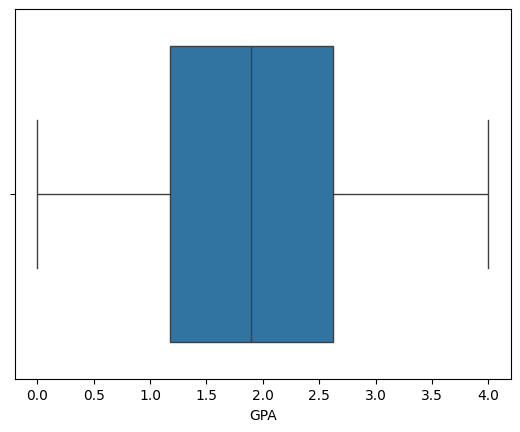

In [ ]:
#horizontal boxplot
boxplot = sns.boxplot(x="GPA", data=df)
plt.show()

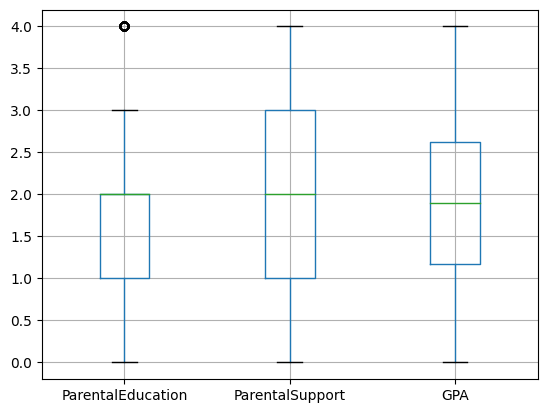

In [ ]:
#boxplot direcly from dataframe
boxplot = df.boxplot(column=['ParentalEducation', 'ParentalSupport', 'GPA'])

In [ ]:
#Same plot above using plotly
fig = go.Figure()

fig.add_trace(go.Box(
 y=df['GPA'],
 x=df['ParentalEducation'],
 name='ParentalEducation',
  marker_color='#3D9970'
))
fig.add_trace(go.Box(
  y=df['GPA'],
  x=df['ParentalSupport'],
  name='ParentalSupport',
  marker_color='#FF4136'
))
fig.update_layout(
  autosize=False,
  width=400,
  height=400,
  title="Comparison ParentalEducation/ParentalSupport/GPA",
  title_x=0.5,
  yaxis_title='GPA',
  xaxis_title='ParentalEducation/ParentalSupport',
  boxmode='group',
  showlegend=True
)
fig.show()

<ipython-input-29-1c9f5f7332b3>:3: UserWarning:

FixedFormatter should only be used together with FixedLocator



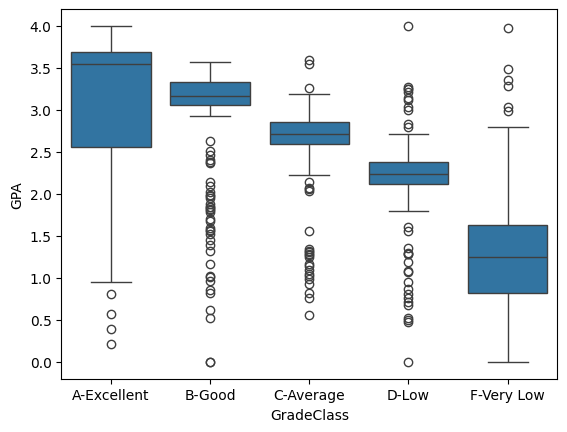

In [ ]:
boxplot = sns.boxplot(x="GradeClass", y="GPA", data=df)
new_labels = ['A-Excellent', 'B-Good', 'C-Average', 'D-Low', 'F-Very Low']
boxplot.set_xticklabels(new_labels)
plt.show()

<ipython-input-30-06d5740c93ab>:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



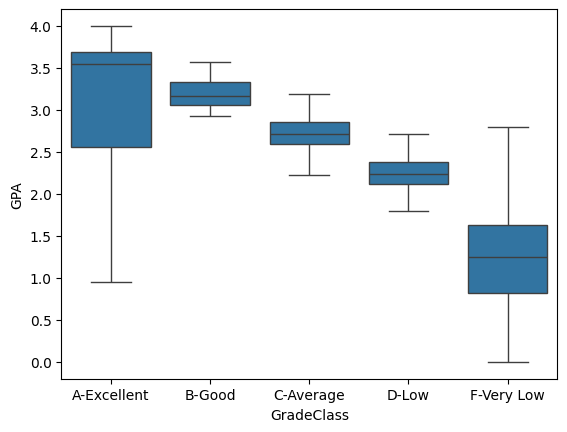

In [ ]:
#Hiding the outliers as there are no outliers in our data
boxplot = sns.boxplot(x="GradeClass", y="GPA", data=df, showfliers=False)
new_labels = ['A-Excellent', 'B-Good', 'C-Average', 'D-Low', 'F-Very Low']
boxplot.set_xticklabels(new_labels)
plt.show()

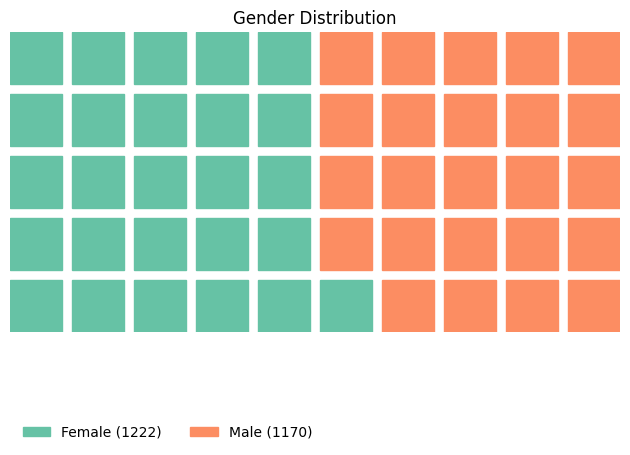

In [ ]:
# Prepare data
gender_counts = df['Gender'].value_counts()

# Waffle plot
gender_labels = {0: 'Male', 1: 'Female'}

# Create the waffle plot
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    columns=10,
    values=gender_counts,
    title={'label': 'Gender Distribution', 'loc': 'center'},
    labels=["{0} ({1})".format(gender_labels[k], v) for k, v in gender_counts.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(gender_counts), 'framealpha': 0}
)

plt.show()

In [ ]:
#Using plotly
ddf = df[['Ethnicity', 'Gender']].value_counts().to_frame().reset_index()
ddf.columns = ['Ethnicity', 'Gender', 'Count']

#new_df = ddf.pivot(index='Ethnicity', columns='Gender')['Count'].fillna(0)

fig = px.imshow(ddf, x=ddf.columns, y=ddf.index, text_auto=True)
fig.update_layout(
    width = 500,
    height = 500,
    title = 'Gender Distribution',
    title_x = 0.5,
    xaxis_title = 'Gender',
    yaxis_title = 'Ethnicity'
    )
fig.show()

In [ ]:
import plotly.io as pio
import plotly.graph_objs as go
pio.renderers.default = 'iframe'
trace = go.Heatmap(
    z=[[5, 7, 11], [8, 10, 12]],
    colorbar = dict(title='Range'),
    hovertemplate='Depth: %{x}<br>Time: %{y}<br>Range: %{z}<extra></extra>'

)
data = [trace]

layout = go.Layout(xaxis=go.layout.XAxis(
    title=go.layout.xaxis.Title(
        text='Depth Axis',
    )),
yaxis=go.layout.YAxis(
    title=go.layout.yaxis.Title(
        text='Time Axis',
    )
))
f6 = go.Figure(data, layout=layout)
pio.show(f6)

In [ ]:
df_gender = df[['Gender']]
df_gender.columns =['Gender']		#adding column name
#df_gender['Gender'] = df_gender['Gender'].replace({'Male':0, 'Female':1}).astype(str)

gender_counts = pd.DataFrame(df['Gender'].value_counts()).reset_index()
gender_counts.columns = ['Gender', 'Count']

fig1 = px.box(df_gender, y="Gender")
fig1.add_trace(go.Surface(z=gender_counts.values.tolist(), colorscale="Viridis"))
fig1.update_layout(
  width=800,
  height=800,
  autosize=False,
  margin=dict(t=0, b=0, l=0, r=0),
  template="plotly_white",
)
fig1.update_scenes(					# Update 3D scene options
  aspectratio=dict(x=1, y=1, z=0.7),
  aspectmode="manual"
)
fig1.update_layout(					# Add dropdown
template='plotly_dark',
updatemenus=[
dict(
  buttons=list([
    dict(
      args=["type", "surface"],
      label="3D Surface",
      method="restyle"
    ),
    dict(
      args=["type", "heatmap"],
      label="Heatmap",
      method="restyle"
    )
  ]),
  direction="down",
  pad={"r": 10, "t": 10},
  showactive=True,
  x=0.1,
  xanchor="left",
  y=1.1,
  yanchor="top"
),
]
)

In [ ]:
#box plot using plotly
fig= px.box(df, x="Tutoring", y="GPA")

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 1],
        ticktext = ['0:Non-Tutoring', '1:Tutoring'],
    ),
    title="Tutoring Vs GPA"
)
fig.show()

<ipython-input-33-d8cddef0d9dd>:3: UserWarning:

FixedFormatter should only be used together with FixedLocator



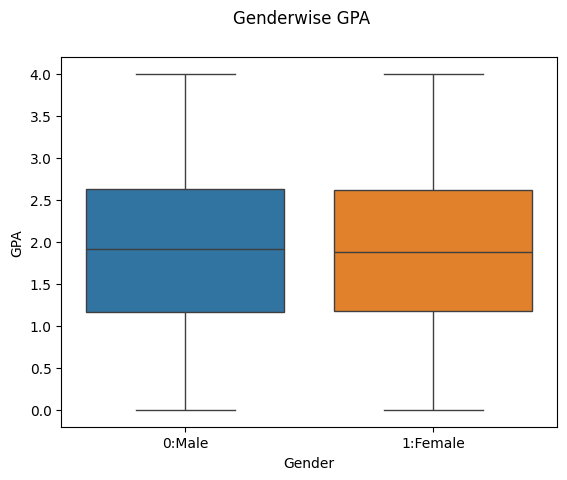

In [ ]:
boxplot = sns.boxplot(data=df, x="Gender", y="GPA", hue="Gender")
new_labels = ['0:Male', '1:Female']
ax = boxplot.set_xticklabels(new_labels)

#plt.legend(title='Gender', loc='lower right', labels=new_labels) #not showing properly
plt.legend().remove()

plt.suptitle('Genderwise GPA')
plt.show()

#both are identical. Not able to differentiate between the values

Medians =  [1.92000615 1.87621098]



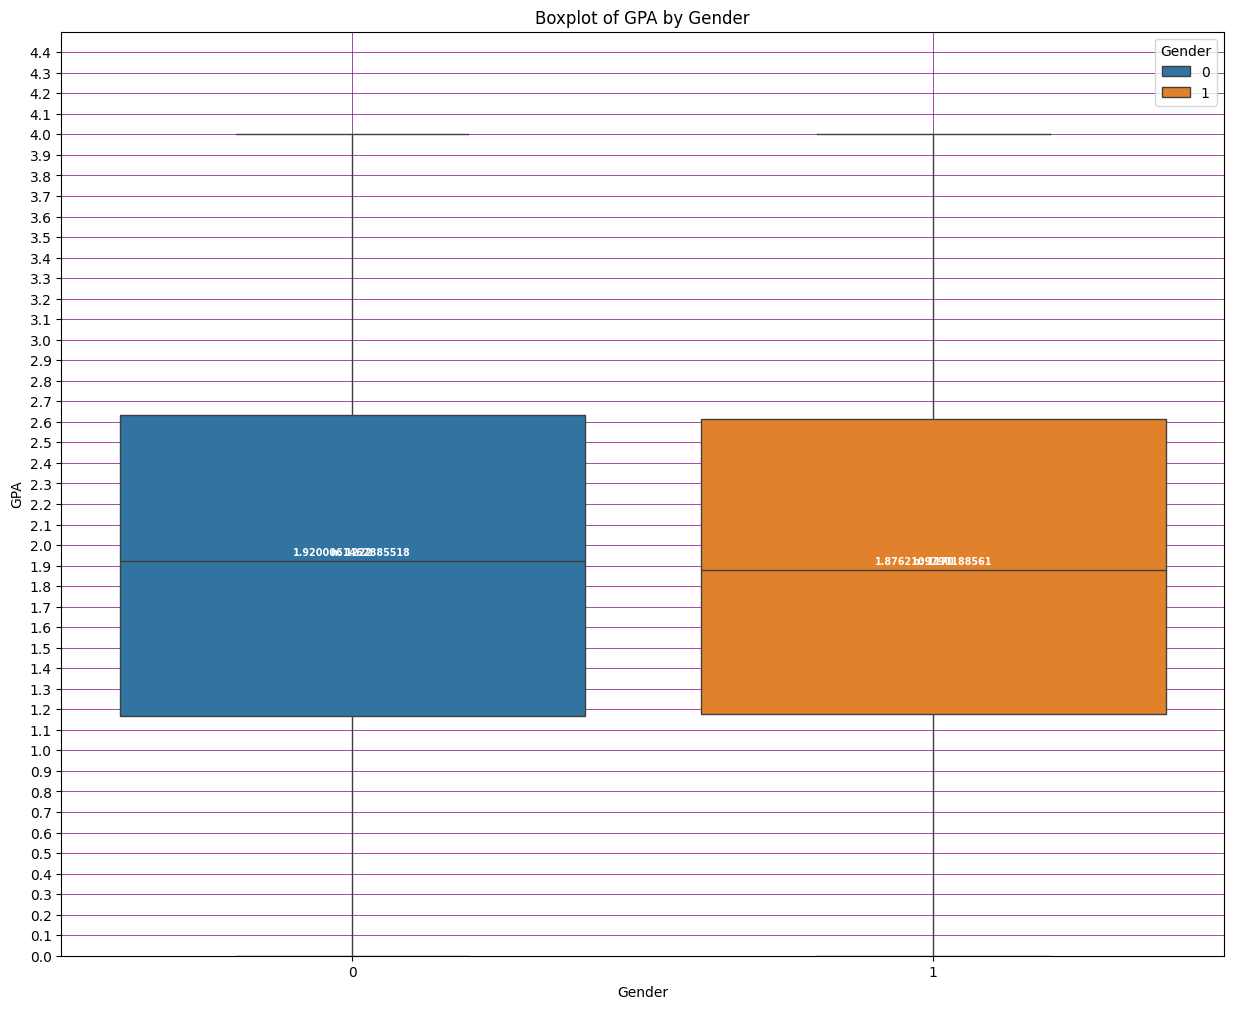

In [ ]:
plt.figure(figsize=(15, 12))

ax = sns.boxplot(x="Gender", y="GPA", data=df, hue = "Gender", showfliers=True)

plt.ylim(0.0, 4.5)
plt.yticks(np.arange(0.0, 4.5, 0.1))
plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='purple')

# Calculate number of obs per group & median to position labels
medians = df.groupby(['Gender'])['GPA'].median().values

print("Medians = ", medians)
print()


nobs = df['Gender'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            medians[tick] + 0.03,
            nobs[tick],
            horizontalalignment='center',
            size='x-small',
            color='w',
            weight='semibold')

# Add it to the plot
for tick, label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            medians[tick] + 0.03,
            medians[tick],
            horizontalalignment='center',
            size='x-small',
            color='w',
            weight='semibold')

plt.title('Boxplot of GPA by Gender')
#plt.suptitle('')  # Remove the default title to make it cleaner
plt.xlabel('Gender')
plt.ylabel('GPA')

# Show the plot
plt.show()

In [ ]:
#box plot using plotly
fig= px.box(df, x="Gender", y="GPA", points="all", notched=True, color="Gender")

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 1],
        ticktext = ['Male', 'Female'],
    ),
    title="Gender Vs GPA",
)

newnames = {'0':'Male', '1': 'Female'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))

fig.show()

<ipython-input-36-cb5ad48ca668>:3: UserWarning:

FixedFormatter should only be used together with FixedLocator



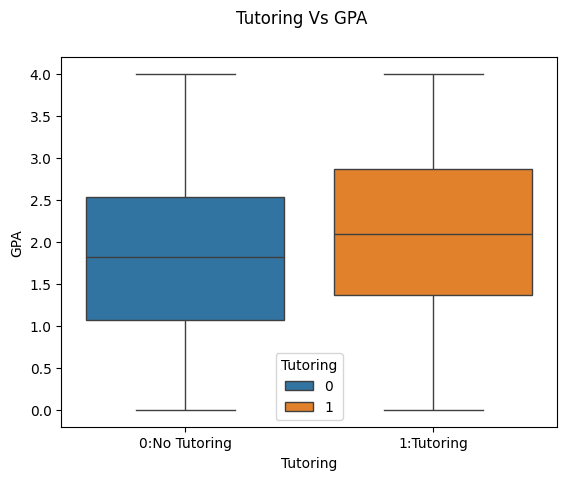

In [ ]:
boxplot = sns.boxplot(data=df, x='Tutoring', y='GPA', hue='Tutoring')
new_labels = ['0:No Tutoring', '1:Tutoring']
boxplot.set_xticklabels(new_labels)

plt.suptitle('Tutoring Vs GPA')
plt.show()

<ipython-input-37-f236b960c5cf>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



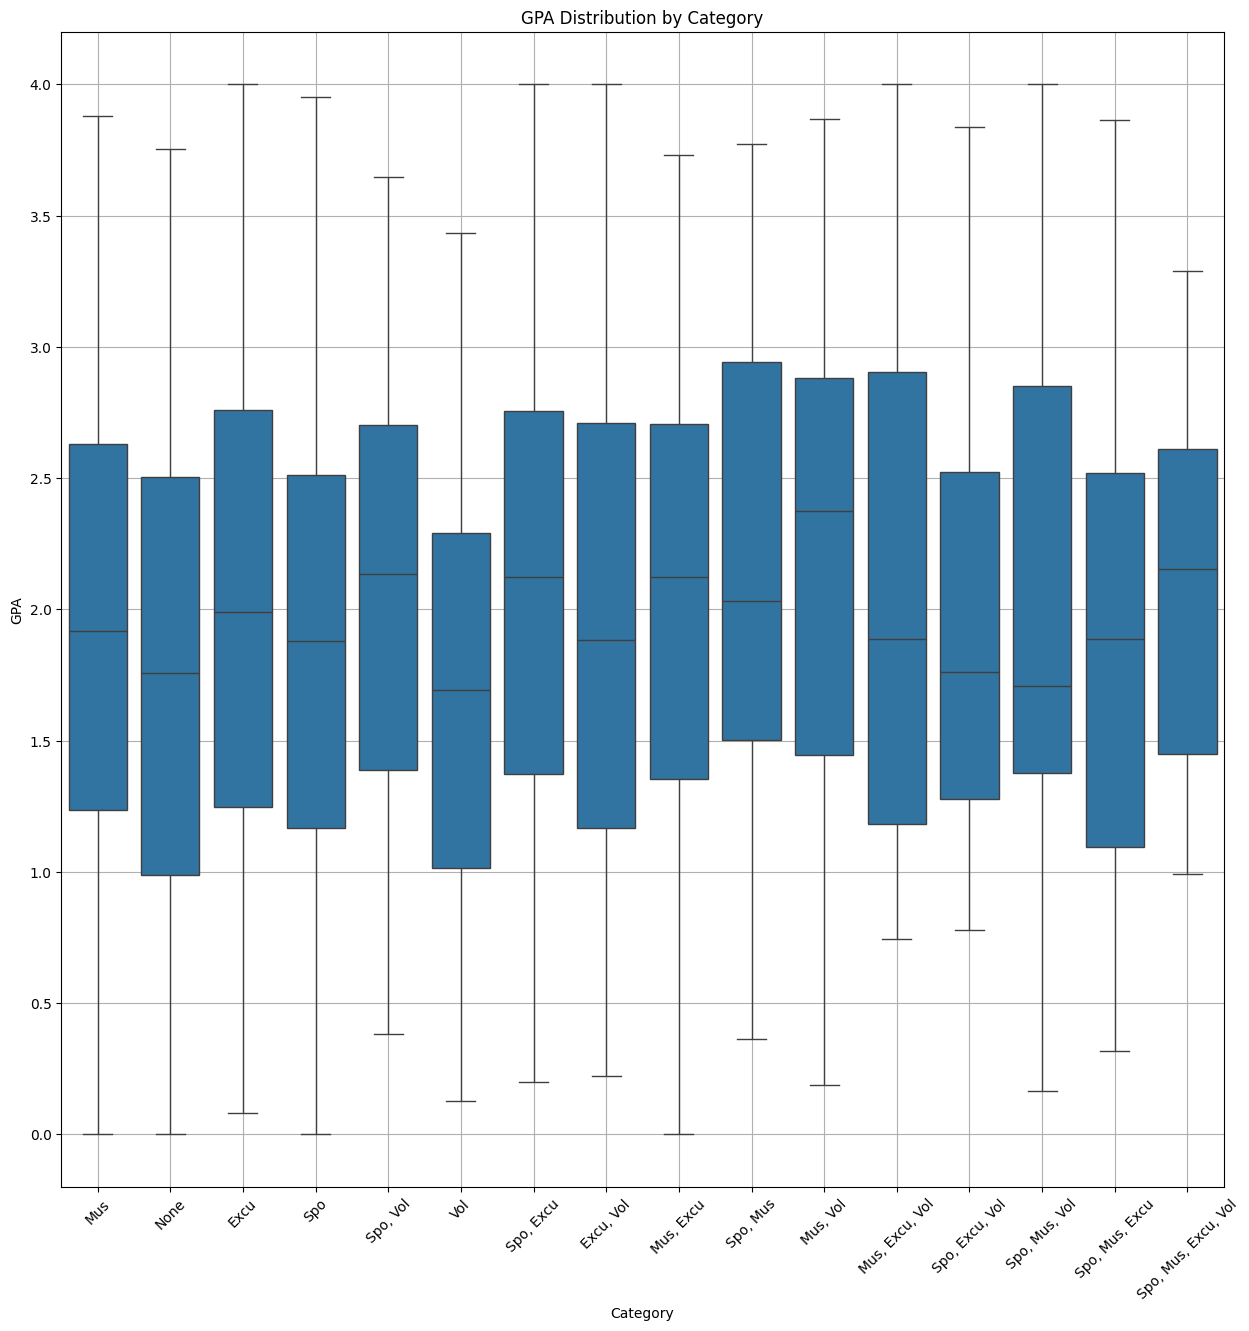

In [ ]:
df1 = df[['Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA']]

plt.figure(figsize=(15, 15))

def categorize(row):
    categories = []
    if row['Sports'] == 1:
        categories.append('Spo')
    if row['Music'] == 1:
        categories.append('Mus')
    if row['Extracurricular'] == 1:
        categories.append('Excu')
    if row['Volunteering'] == 1:
        categories.append('Vol')

    if not categories:
        return 'None'
    else:
        return ', '.join(categories)

df1['Category'] = df1.apply(categorize, axis=1)

sns.boxplot(x='Category', y='GPA', data=df1)

# Add title and labels
plt.title('GPA Distribution by Category')
plt.xlabel('Category')
plt.ylabel('GPA')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.grid(True)

# Show the plot
plt.show()

<ipython-input-38-d52ae188ecef>:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



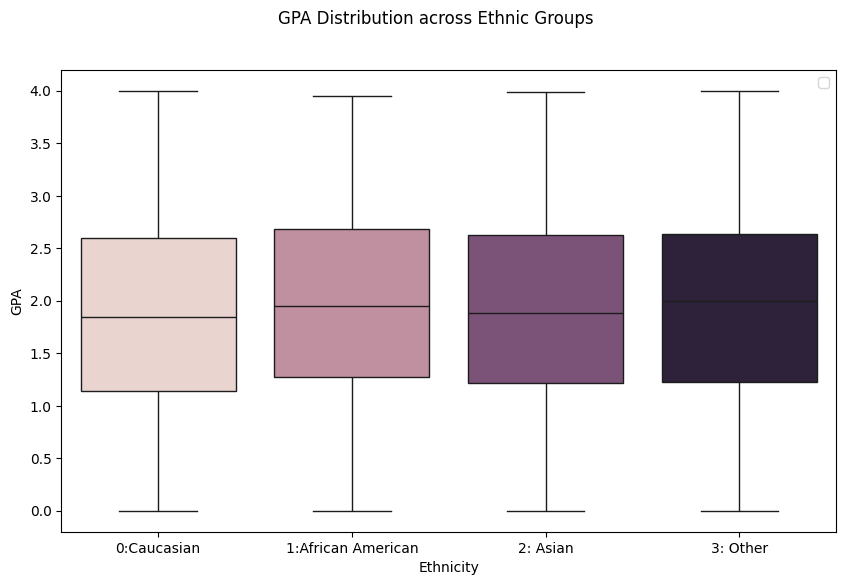

In [ ]:
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(x='Ethnicity', y='GPA', data=df, hue="Ethnicity")

plt.suptitle('GPA Distribution across Ethnic Groups')
new_labels = ['0:Caucasian', '1:African American', '2: Asian', '3: Other']
boxplot.set_xticklabels(new_labels)

plt.xlabel('Ethnicity')
plt.ylabel('GPA')

plt.legend('')  # Remove the legend
plt.show()

<ipython-input-39-d2dfcb54fd6c>:7: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-39-d2dfcb54fd6c>:13: UserWarning:

FixedFormatter should only be used together with FixedLocator



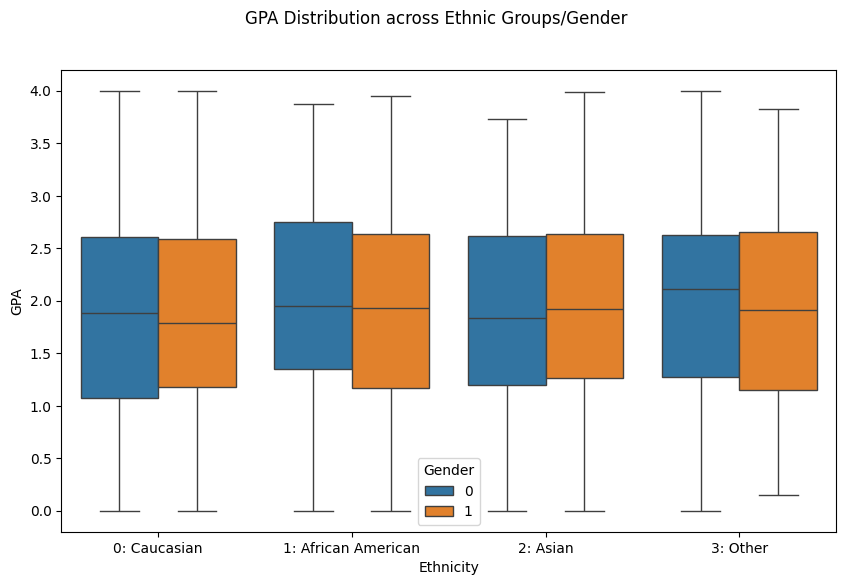

In [ ]:
#Using seaborn
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(x='Ethnicity', y='GPA', data=df, hue="Gender")

plt.suptitle('GPA Distribution across Ethnic Groups/Gender')
new_labels = ['0:Caucasian', '1:African American', '2: Asian', '3: Other']
boxplot.set_xticklabels(new_labels)

plt.xlabel('Ethnicity')
plt.ylabel('GPA')

new_labels = ['0: Caucasian', '1: African American', '2: Asian', '3: Other']
boxplot.set_xticklabels(new_labels)

plt.show()

In [ ]:
#box plot using plotly
#created a new dataframe to make the plot look exactly the same as
df1 = df[['Ethnicity', 'Gender', 'GPA']]
df1 = df1.sort_values(by=['Ethnicity','Gender', 'GPA'], ignore_index=True)

fig= px.box(df1, x="Ethnicity", y="GPA", color="Gender")

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 1, 2, 3],
        ticktext = ['0:Caucasian', '1:African American', '2:Asian', '3:Other']
    ),
    title="Gender Vs GPA",
)

newnames = {'0':'Male', '1': 'Female'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))

fig.show()

<ipython-input-41-6c29469b2f56>:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



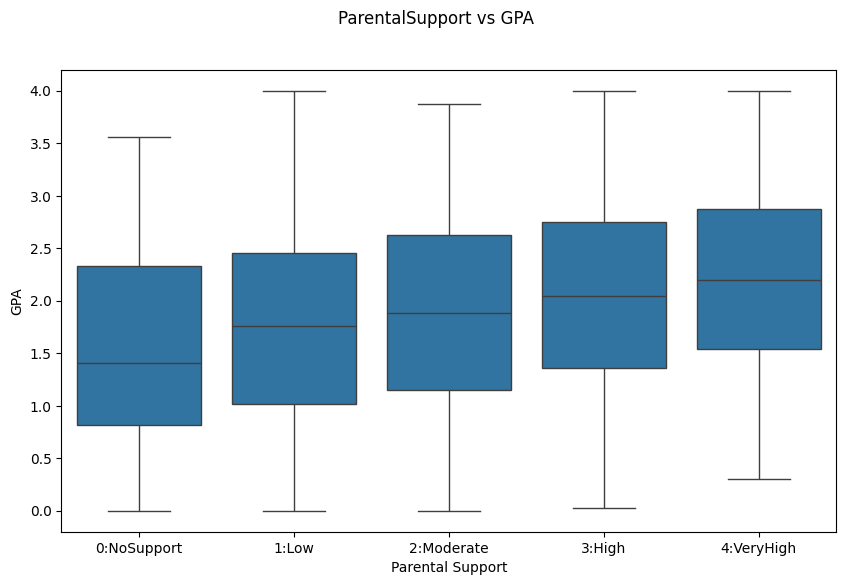

In [ ]:
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(x='ParentalSupport', y='GPA', data=df)

plt.suptitle('ParentalSupport vs GPA')
new_labels = ['0:NoSupport', '1:Low', '2:Moderate', '3:High', '4:VeryHigh' ]
boxplot.set_xticklabels(new_labels)

plt.xlabel('Parental Support')
plt.ylabel('GPA')

plt.show()

In [ ]:
# plt.figure(figsize=(10, 6))

# df2 = df[['StudyTimeWeekly', 'GPA']]
# #print(df2.min(), df1.max())       #Min=0.001057 Max=19.978094

# df2['StudyTimeWeekly'] = df2['StudyTimeWeekly'].round().astype(int)
# #print(df2.min(), df2.max())       #Min=0 Max=20

# def categorize_study_time(hours):
#     if hours <= 5:
#         return 'Low'
#     elif 5 < hours <= 10:
#         return 'Medium'
#     elif 10 < hours <= 15:
#         return 'High'
#     else:
#         return 'Very High'

# # Apply the function to the 'StudyTimeHours' column
# df2['StudyTimeCategory'] = df2['StudyTimeWeekly'].apply(categorize_study_time)

# boxplot = sns.boxplot(x='StudyTimeCategory', y='GPA', data=df2)

# plt.suptitle('StudyTimeWeekly vs GPA')
# plt.xlabel('StudyTimeWeekly')
# plt.ylabel('GPA')

# plt.show()

In [ ]:
#Using GraphObject
plt.figure(figsize=(10, 6))

df2 = df[['StudyTimeWeekly', 'GPA']]

df2['GPA'] = df2['GPA'].round(0).astype(int)

box_trace = go.Box(
    x=df2.GPA,
    y=df2.StudyTimeWeekly,
    name='s'
)

# Create figure and add trace
fig = go.Figure(box_trace)

# Update layout
fig.update_layout(
    title='Box Plot of GPA Vs Study TimeWeekly Hours',
    xaxis_title=dict(text='GPA'),
    yaxis_title=dict(text='Study Time Weekly Hours'),
 )

# Display the figure
fig.show()


<ipython-input-42-acd4e11d3028>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 1000x600 with 0 Axes>

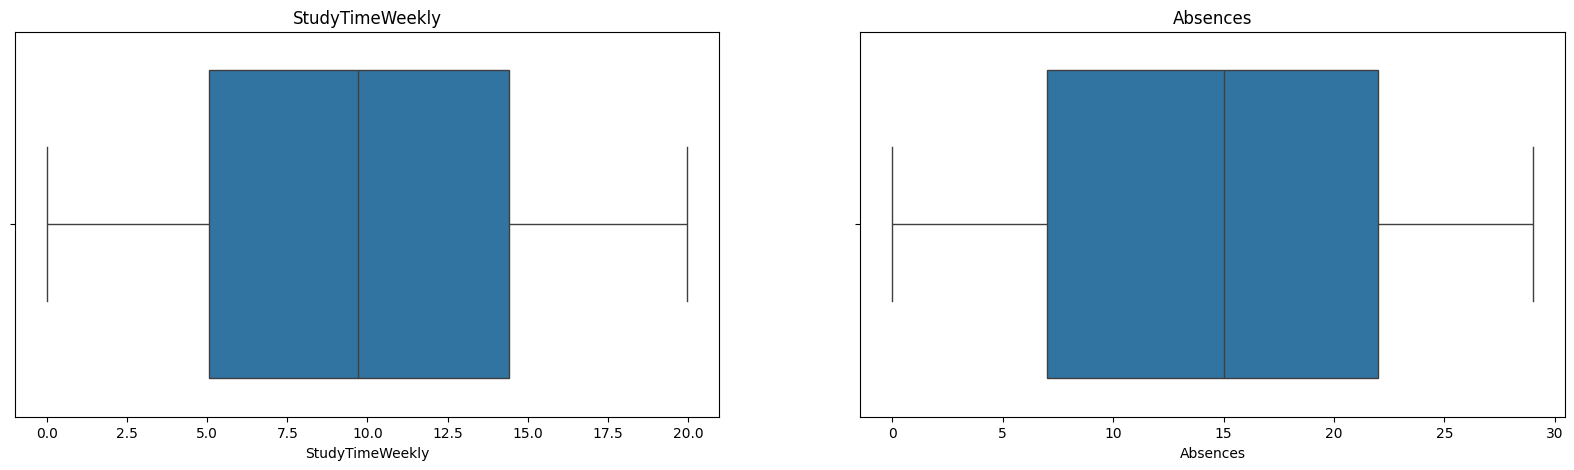

In [ ]:
df_selected = df[['StudyTimeWeekly', 'Absences']]

#nunique - Count number of distinct elements in specified axis.
#numerical_columns = [col for col in df_selected.columns if df[col].nunique() > 5]
columns = [col for col in df_selected.columns]

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Loop through the columns in the DataFrame
for idx in range(2):
    # Create a boxplot for each column
    sns.boxplot(ax=ax[idx], x=df_selected[columns[idx]])
    ax[idx].set_title(columns[idx])

In [ ]:
#Same graph above using plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go

x0 = df['StudyTimeWeekly']
x1 = df['Absences']

fig = go.Figure()
fig.add_trace(go.Box(x=x0, name='Study Time<br>Weekly Hours'))
fig.add_trace(go.Box(x=x1, name='Absences Days'))

fig.update_layout(
    height=800,
    width=800,
    title_text='Subplots Study Hours/Absences',
    title_x=0.5,
    showlegend=True
    )

fig.show()

In [ ]:
fig2 = px.box(df, x='Absences', y='GPA')
fig2.update_layout(
  width=500,
  height=400,
  autosize=False,
  title="Absences Vs GPA",
  title_x=0.5,
  xaxis=dict(rangeslider=dict(visible=True), type="linear")
)
fig2.show()

In [ ]:
print(df.groupby("Ethnicity")["StudyTimeWeekly"].mean())

Ethnicity
0     9.748481
1     9.929420
2     9.410406
3    10.315737
Name: StudyTimeWeekly, dtype: float64


In [ ]:
#print(df.groupby("Ethnicity")["GPA"].mean())
#print(df.groupby("StudyTimeWeekly")["GPA"].mean())

[Text(0.5, 0, 'StudyTimeWeekly'),
 Text(0, 0.5, 'GPA'),
 Text(0.5, 1.0, 'StudyTimeWeekly Vs GPA with Regression Line')]

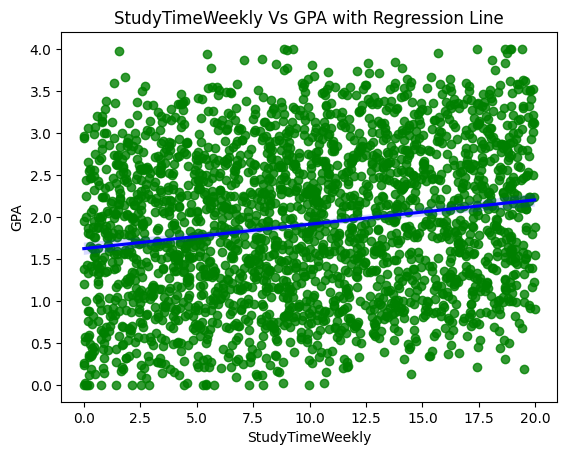

In [ ]:
ax = sns.regplot(x="StudyTimeWeekly", y="GPA", data=df,color="g",line_kws={'color':'blue'})
ax.set(xlabel="StudyTimeWeekly",ylabel="GPA",title="StudyTimeWeekly Vs GPA with Regression Line")

In [ ]:
from sklearn.model_selection import train_test_split

#df2 = df[['StudyTimeWeekly', 'GPA']]

x = df[['StudyTimeWeekly']]
y = df[['GPA']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
linear_model = LinearRegression()

In [ ]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = linear_model.predict(x_test)
dddf = pd.DataFrame(y_pred)

dddf.columns =['y_pred']

dddf.head()

,y_pred
0,1.826476
1,2.096201
2,1.716864
3,1.714725
4,2.006418


In [ ]:
#accuracy
linear_model.score(x_train,y_train)

0.03812897363959222

In [ ]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.003990483380242438

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.7551200087378421

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.8168395352298677

In [ ]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y_test, y_pred)

0.6975981684567405

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.0005845155514496714

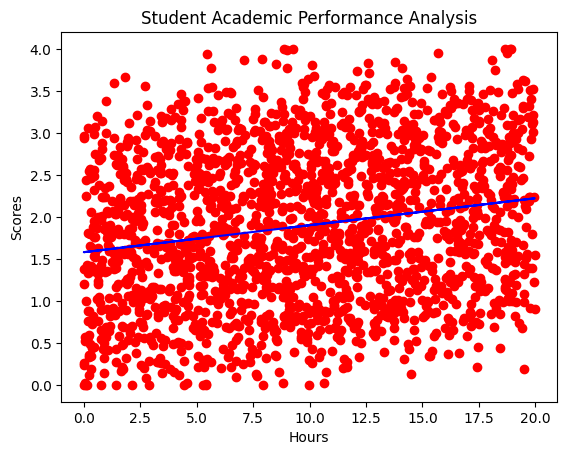

In [ ]:
plt.scatter(x_train,y_train, color= 'red')
plt.plot(x_train, linear_model.predict(x_train), color= 'blue' )
plt.title('Student Academic Performance Analysis')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

#Other types of Graphs

In [ ]:
df.head()

,StudentID,Age,Gender,Ethnicity,EthnicityDesc,ParentalEducation,ParentEduDesc,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,ParentSupportDesc,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,GradeClassDesc,Combined
0,1001,17,1,0,Caucasian,2,Some College,19.833723,7,1,2,Moderate,0,0,1,0,2.929196,2.0,Moderate,2.0(Moderate)
1,1002,18,0,0,Caucasian,1,High School,15.408756,0,0,1,Low,0,0,0,0,3.042915,1.0,Good,1.0(Good)
2,1003,15,0,2,Asian,3,Bachelor's,4.210570,26,0,2,Moderate,0,0,0,0,0.112602,4.0,Very Low,4.0(Very Low)
3,1004,17,1,0,Caucasian,3,Bachelor's,10.028829,14,0,3,High,1,0,0,0,2.054218,3.0,Low,3.0(Low)
4,1005,17,1,0,Caucasian,2,Some College,4.672495,17,1,3,High,0,0,0,0,1.288061,4.0,Very Low,4.0(Very Low)


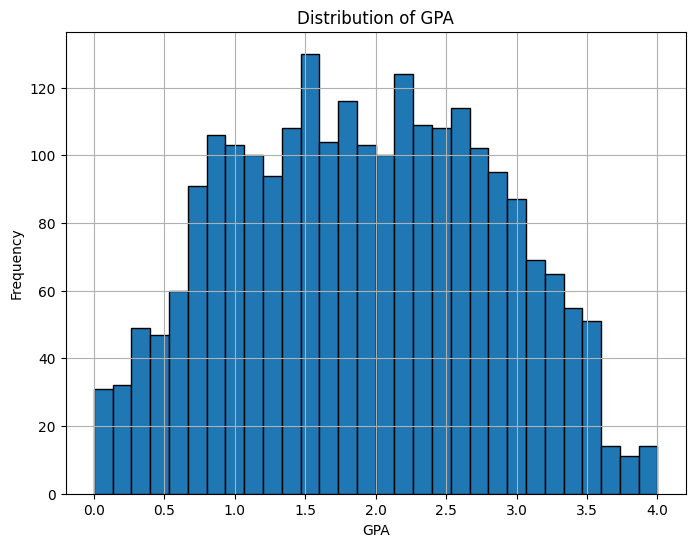

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['GPA'], bins=30, edgecolor='black')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.title('Distribution of GPA')
plt.grid(True)
plt.show()

In [ ]:
#using plotly
fig = px.histogram(df.GPA, x="GPA", nbins=30, title="Distribution of GPA")
fig.show()

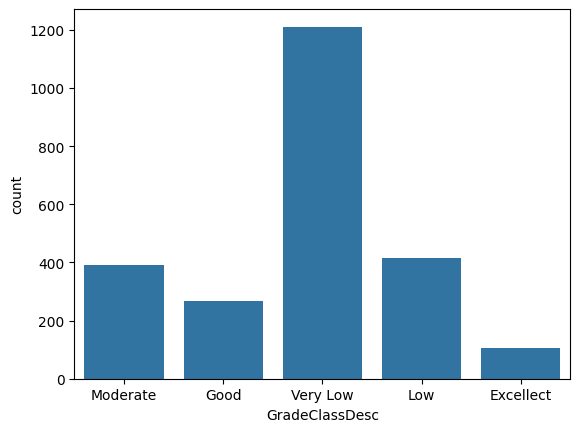

In [ ]:
sns.countplot(data=df, x="GradeClassDesc")
plt.show()

In [ ]:
df['GradeClassDesc'].value_counts()

,count
GradeClassDesc,
Very Low,1211
Low,414
Moderate,391
Good,269
Excellect,107


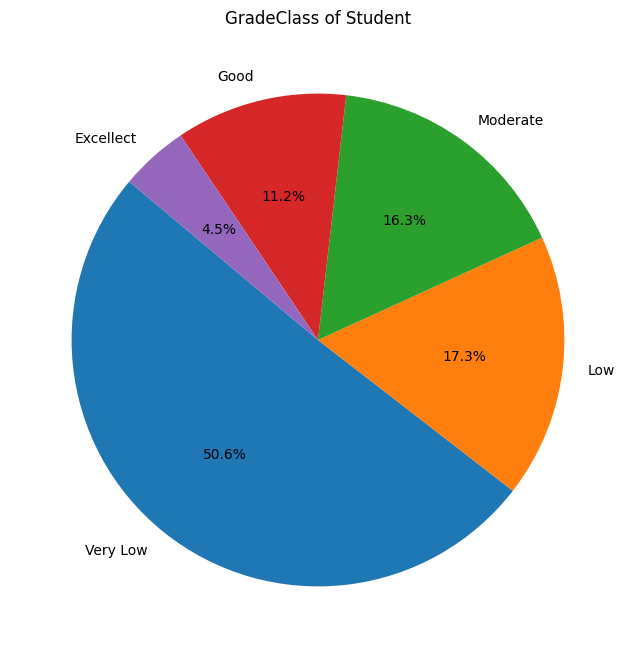

In [ ]:
gradecounts = df['GradeClassDesc'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gradecounts, labels=gradecounts.index, autopct='%1.1f%%', startangle=140)
plt.title('GradeClass of Student')
plt.show()

In [ ]:
series = df['Tutoring'].value_counts()
print("No Tutoring = ", series[0])
print("Tutoring = ", series[1])

No Tutoring =  1671
Tutoring =  721


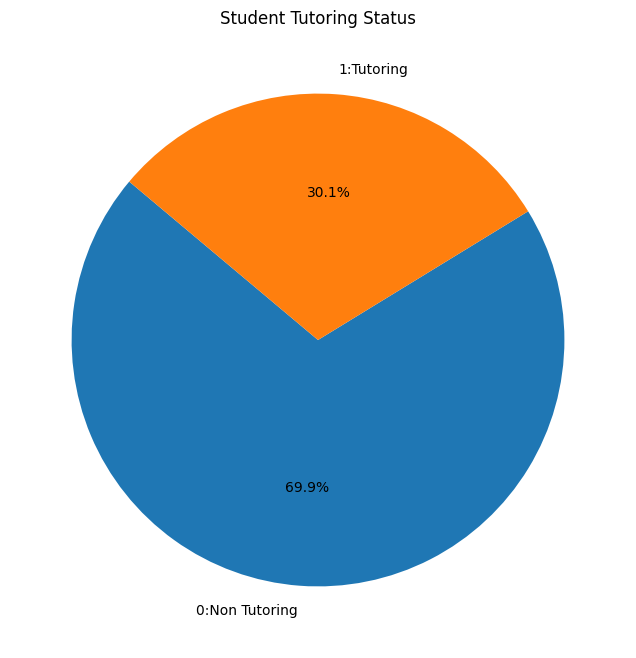

In [ ]:
counts = df['Tutoring'].value_counts()
plt.figure(figsize=(8, 8))
plt.title('Student Tutoring Status')
label = ['0:Non Tutoring', '1:Tutoring']
plt.pie(counts, labels=label, autopct='%1.1f%%', startangle=140)
plt.show()

In [ ]:
series = df['Gender'].value_counts()
print("Males = ", series[0])
print("Females = ", series[1])

Males =  1170
Females =  1222


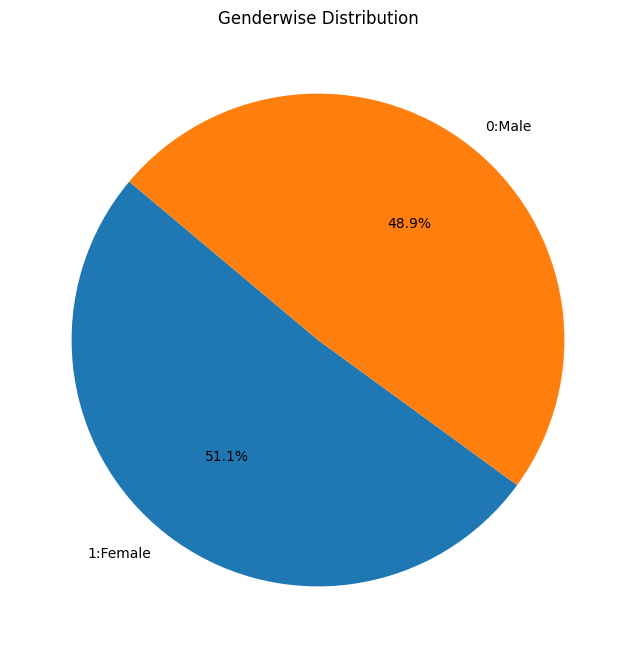

In [ ]:
counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 8))
label = ['1:Female', '0:Male']
plt.pie(counts, labels=label, autopct='%1.1f%%', startangle=140)
plt.title('Genderwise Distribution')
plt.show()

In [ ]:
df['EthnicityDesc'].value_counts()

,count
EthnicityDesc,
Caucasian,1207
African American,493
Asian,470
Other,222


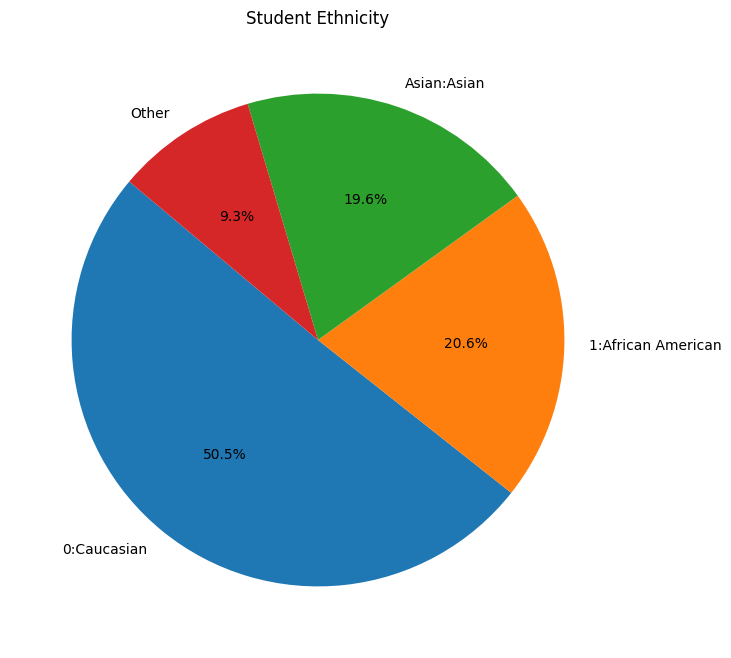

In [ ]:
counts = df['Ethnicity'].value_counts()
plt.figure(figsize=(8, 8))
plt.title('Student Ethnicity')
label = ['0:Caucasian', '1:African American', 'Asian:Asian', 'Other' ]
plt.pie(counts, labels=label, autopct='%1.1f%%', startangle=140)
plt.show()

In [ ]:
fig = px.pie(df, values='GPA', names='Ethnicity',
             title='Ethnicity Vs GPA',
             hover_data=['GPA'], labels={'GPA':'GPA'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()